In [1]:
%cd drive/MyDrive/MML/Kryptonite-N

/content/drive/MyDrive/MML/Kryptonite-N


In [2]:
import tempfile
import os
import numpy as np
import torch
from tqdm import tqdm
from torch import nn, optim
from sklearn.model_selection import train_test_split
from transformers import GPT2Tokenizer, GPT2Model
import pandas as pd
from tensorflow.keras.layers import Dropout, BatchNormalization

In [3]:
!pip install tensorflow

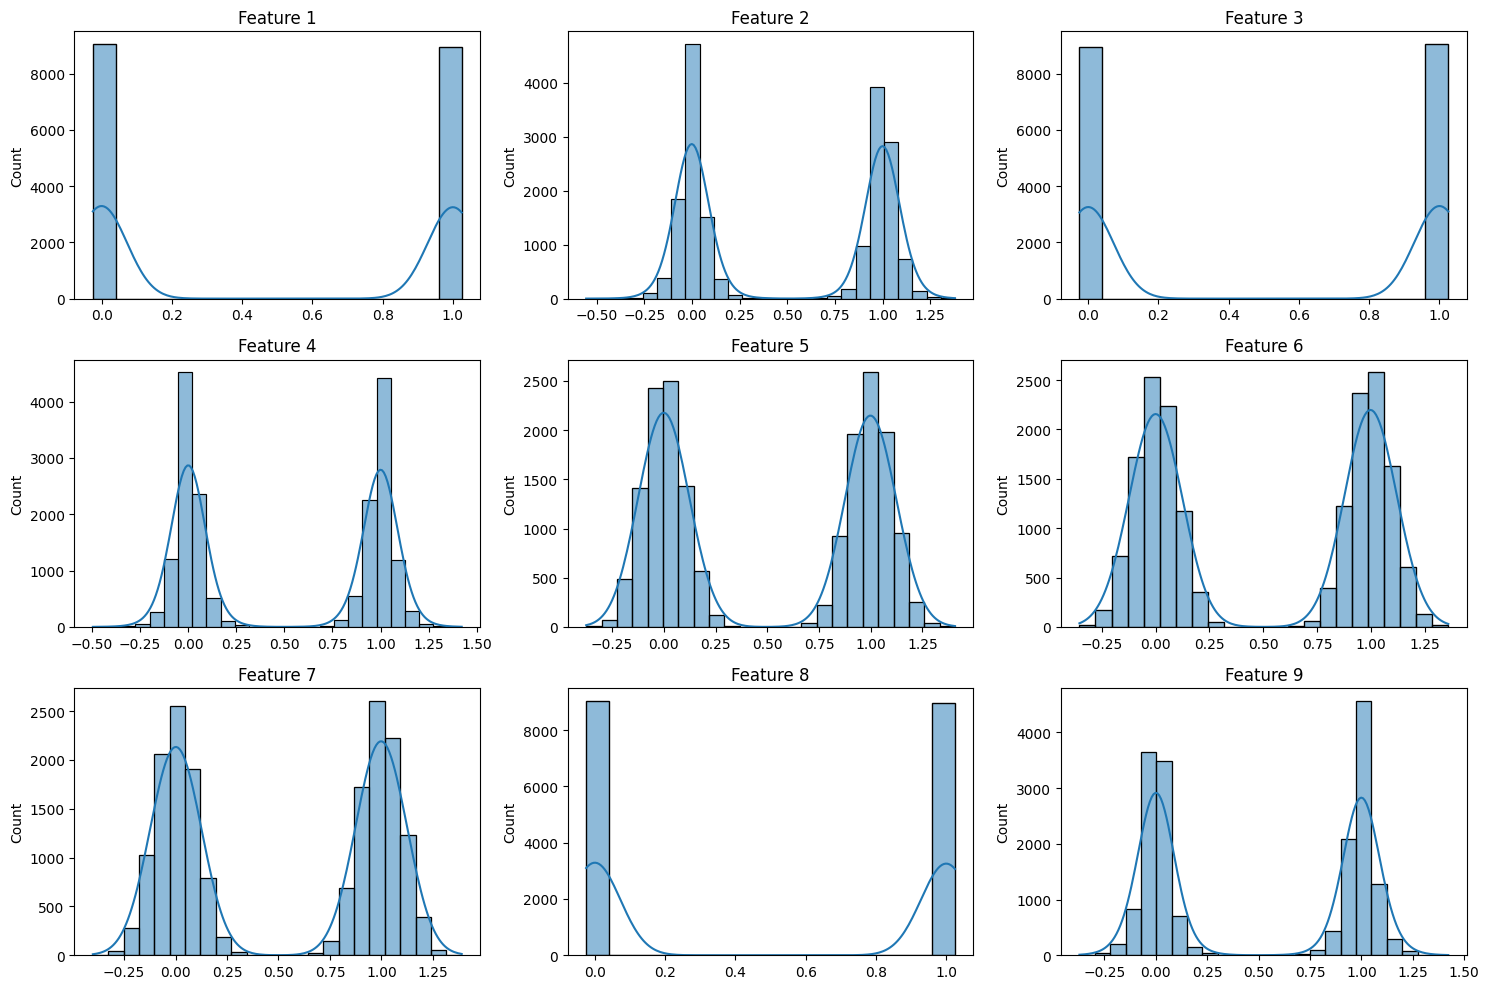

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of each feature using histograms or KDE plots
X = np.load('Datasets/kryptonite-9-X.npy')

plt.figure(figsize=(15, 10))
for i in range(X.shape[1]):  # Loop over each feature
    plt.subplot(3, 3, i+1)  # 3 rows, 5 columns of subplots
    sns.histplot(X[:, i], kde=True)
    plt.title(f"Feature {i+1}")
plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter

y = np.load('Datasets/kryptonite-9-y.npy')
print(Counter(y))

Counter({1: 9036, 0: 8964})


In [ ]:
np.shape(X)

(18000, 9)

Decsiosn Tree with Adaboost

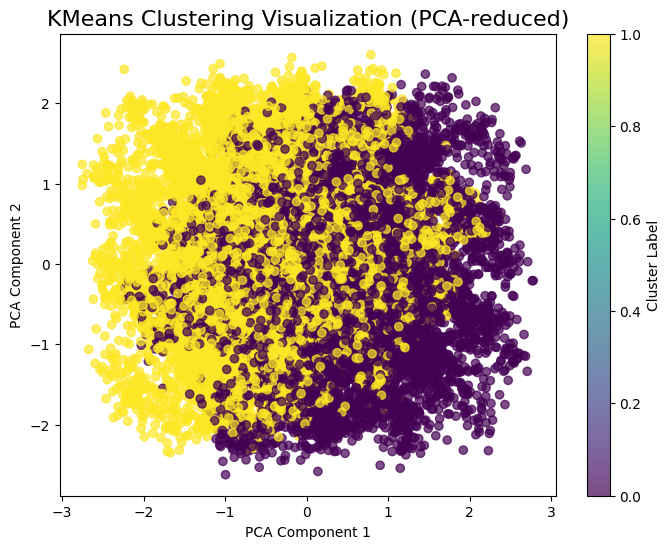

Clustering Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      8964
           1       0.50      0.50      0.50      9036

    accuracy                           0.50     18000
   macro avg       0.50      0.50      0.50     18000
weighted avg       0.50      0.50      0.50     18000



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

# Load your data
X = np.load('Datasets/kryptonite-9-X.npy')
y = np.load('Datasets/kryptonite-9-y.npy')

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering to the data
kmeans = KMeans(n_clusters=2, random_state=42)  # You can adjust the number of clusters
X_clustered = kmeans.fit_predict(X_scaled)

# Reduce the data to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the clusters in 2D (PCA components)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_clustered, cmap='viridis', marker='o', alpha=0.7)
plt.title('KMeans Clustering Visualization (PCA-reduced)', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Optional: Print a classification report to evaluate the clustering (if true labels are available)
print("Clustering Classification Report:")
print(classification_report(y, X_clustered))







Extra Trees with Standardizartion and then Polynomial Feature Transform

In [5]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report

# Load the dataset
X = np.load('Datasets/kryptonite-9-X.npy')
y = np.load('Datasets/kryptonite-9-y.npy')

# Step 1: Polynomial Feature Expansion
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(X)

# Step 2: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Initialize the Extra Trees Classifier
model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Step 3: Cross-validation setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to store results
fold_reports = []
y_pred_overall = np.zeros_like(y)

# Step 4: Cross-validation loop
for fold, (train_index, test_index) in enumerate(skf.split(X_scaled, y), 1):
    # Split into training and test sets for the current fold
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_overall[test_index] = y_pred

    # Generate classification report for the current fold
    report = classification_report(y_test, y_pred, output_dict=True)
    fold_reports.append(report)

    # Print the fold's classification report
    print(f"\nClassification Report for Fold {fold}:\n")
    print(classification_report(y_test, y_pred))

# Step 5: Overall classification report
print("\nOverall Classification Report:\n")
print(classification_report(y, y_pred_overall))



Classification Report for Fold 1:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1792
           1       0.95      0.95      0.95      1808

    accuracy                           0.95      3600
   macro avg       0.95      0.95      0.95      3600
weighted avg       0.95      0.95      0.95      3600


Classification Report for Fold 2:

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1793
           1       0.95      0.96      0.95      1807

    accuracy                           0.95      3600
   macro avg       0.95      0.95      0.95      3600
weighted avg       0.95      0.95      0.95      3600


Classification Report for Fold 3:

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1793
           1       0.96      0.95      0.96      1807

    accuracy                           0.96      3600
   macro avg       0

Extra Trees with Polynomial Feature Transform and then Standardizartion (Recommended)




In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load and preprocess data
X = np.load('Datasets/kryptonite-9-X.npy')
y = np.load('Datasets/kryptonite-9-y.npy')

# Step 1: Scale the features (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Generate Polynomial Features
degree = 4  # Degree of the polynomial features (you can adjust this value)
poly = PolynomialFeatures(degree=degree, include_bias=False)  # Exclude bias term (intercept)
X_poly = poly.fit_transform(X_scaled)  # Transform the original data to polynomial features

# Step 3: Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the ExtraTrees model
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the ExtraTrees model on the polynomial features
et_model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model on the test set
y_pred = et_model.predict(X_test)

# Print classification report to evaluate performance
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

# Optional: You can print the accuracy score directly
from sklearn.metrics import accuracy_score
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))




Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1808
           1       0.96      0.96      0.96      1792

    accuracy                           0.96      3600
   macro avg       0.96      0.96      0.96      3600
weighted avg       0.96      0.96      0.96      3600

Accuracy on Test Set: 0.9575


Cross-Validation with Classification Report for Each Fold

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, accuracy_score

# Load and preprocess data
X = np.load('Datasets/kryptonite-9-X.npy')
y = np.load('Datasets/kryptonite-9-y.npy')

# Step 1: Scale the features (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Generate Polynomial Features
degree = 4  # Degree of the polynomial features
poly = PolynomialFeatures(degree=degree, include_bias=False)  # Exclude bias term (intercept)
X_poly = poly.fit_transform(X_scaled)  # Transform the original data to polynomial features

# Step 3: Initialize the ExtraTreesClassifier model
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Step 4: Initialize KFold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 5: Perform K-Fold Cross-Validation and print classification report for each fold
for fold, (train_index, val_index) in enumerate(kf.split(X_poly), 1):
    print(f"Fold {fold}")

    # Split data into training and validation sets based on the current fold
    X_train, X_val = X_poly[train_index], X_poly[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Train the model on the training set
    et_model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred = et_model.predict(X_val)

    # Print the classification report for the current fold
    print(classification_report(y_val, y_val_pred))
    print("="*80)  # Separator for clarity between folds


Fold 1
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1808
           1       0.96      0.96      0.96      1792

    accuracy                           0.96      3600
   macro avg       0.96      0.96      0.96      3600
weighted avg       0.96      0.96      0.96      3600

Fold 2
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1786
           1       0.96      0.97      0.96      1814

    accuracy                           0.96      3600
   macro avg       0.96      0.96      0.96      3600
weighted avg       0.96      0.96      0.96      3600

Fold 3
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1787
           1       0.96      0.96      0.96      1813

    accuracy                           0.96      3600
   macro avg       0.96      0.96      0.96      3600
weighted avg       0.96      0.96      0.96      3600

Decision Trees with Polynomial Feature Transform

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load and preprocess data
X = np.load('Datasets/kryptonite-12-X.npy')
y = np.load('Datasets/kryptonite-12-y.npy')

# Step 1: Scale the features (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Generate Polynomial Features (degree=4)
degree = 4  # Degree of the polynomial features (you can adjust this value)
poly = PolynomialFeatures(degree=degree, include_bias=False)  # Exclude bias term (intercept)
X_poly = poly.fit_transform(X_scaled)  # Transform the original data to polynomial features

# Step 3: Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the RandomForest model on the polynomial features
rf_model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model on the test set
y_pred = rf_model.predict(X_test)

# Print classification report to evaluate performance
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

# Optional: Print the accuracy score directly
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2396
           1       0.89      0.91      0.90      2404

    accuracy                           0.90      4800
   macro avg       0.90      0.90      0.90      4800
weighted avg       0.90      0.90      0.90      4800

Accuracy on Test Set: 0.8960416666666666


Decision Trees with Cross-Validation and Polynomial Features:

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, accuracy_score

# Load and preprocess data
X = np.load('Datasets/kryptonite-12-X.npy')
y = np.load('Datasets/kryptonite-12-y.npy')

# Step 1: Scale the features (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Generate Polynomial Features (degree=4)
degree = 4  # Degree of the polynomial features
poly = PolynomialFeatures(degree=degree, include_bias=False)  # Exclude bias term (intercept)
X_poly = poly.fit_transform(X_scaled)  # Transform the original data to polynomial features

# Step 3: Initialize the DecisionTreeClassifier model
dt_model = DecisionTreeClassifier(random_state=42)

# Step 4: Initialize KFold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 5: Perform K-Fold Cross-Validation and print classification report for each fold
for fold, (train_index, val_index) in enumerate(kf.split(X_poly), 1):
    print(f"Fold {fold}")

    # Split data into training and validation sets based on the current fold
    X_train, X_val = X_poly[train_index], X_poly[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Train the model on the training set
    dt_model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred = dt_model.predict(X_val)

    # Print the classification report for the current fold
    print(classification_report(y_val, y_val_pred))
    print("="*80)  # Separator for clarity between folds


Fold 1
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2396
           1       0.88      0.88      0.88      2404

    accuracy                           0.88      4800
   macro avg       0.88      0.88      0.88      4800
weighted avg       0.88      0.88      0.88      4800

Fold 2
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2341
           1       0.89      0.88      0.89      2459

    accuracy                           0.88      4800
   macro avg       0.88      0.88      0.88      4800
weighted avg       0.88      0.88      0.88      4800

Fold 3
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2350
           1       0.90      0.91      0.90      2450

    accuracy                           0.90      4800
   macro avg       0.90      0.90      0.90      4800
weighted avg       0.90      0.90      0.90      4800